In [1]:
def evaluate_classifier(df_positive, df_negative, pos_label=1, neg_label=0, title_suffix="", save_path=None):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_predict
    from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
    import os

    # Labels setzen
    df_positive = df_positive.copy()
    df_negative = df_negative.copy()
    df_positive['Label'] = pos_label
    df_negative['Label'] = neg_label

    # Kombinieren
    data = pd.concat([df_positive, df_negative], ignore_index=True)

    # Visualisierung: Histogramm
    plt.figure()
    sns.histplot(data=data, x='z-score calculated from 7. 8. and 9.', hue='Label', kde=True, bins=50)
    plt.title(f"Distribution of z-scores {title_suffix}")
    plt.xlabel("z-Score")
    plt.ylabel("Anzahl")
    if save_path:
        filename = os.path.join(save_path, f"SISSIz_Histogram_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

    # Vorbereitung
    X = data[['z-score calculated from 7. 8. and 9.']]
    y = data['Label']
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Cross-Validation
    y_pred = cross_val_predict(model, X, y, cv=5, method='predict')
    y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    labels = ["Negative", "Positive"]

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix {title_suffix}")
    if save_path:
        filename = os.path.join(save_path, f"SISSIz_Confusion_Matrix_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

    print("\n Classification Report:\n", classification_report(y, y_pred))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC (AUC = {roc_auc:.2f})", color='red')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC-Curve {title_suffix}")
    plt.legend(loc="lower right")
    plt.grid(True)
    if save_path:
        filename = os.path.join(save_path, f"SISSIz_ROC_Curve_{title_suffix.replace(' ', '_')}.png")
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


In [2]:
import pandas as pd

# Load the data
df_native = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/native.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])
df_sissiz_mono = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/sissiz_mono.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])
df_sissiz_di = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/sissiz_di.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])
df_multiperm_mono = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/multiperm_mono.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])
df_multiperm_di = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/multiperm_di.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])
df_aln_shuffle = pd.read_excel("D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz_Excel/alifoldz.xlsx", usecols=['z-score calculated from 7. 8. and 9.'])

In [3]:
filter = 50

df_native_filterd = df_native[(df_native['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_native['z-score calculated from 7. 8. and 9.'] <= filter)]
df_sissiz_mono_filterd = df_sissiz_mono[(df_sissiz_mono['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_sissiz_mono['z-score calculated from 7. 8. and 9.'] <= filter)]
df_sissiz_di_filterd = df_sissiz_di[(df_sissiz_di['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_sissiz_di['z-score calculated from 7. 8. and 9.'] <= filter)]
df_multiperm_mono_filterd = df_multiperm_mono[(df_multiperm_mono['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_multiperm_mono['z-score calculated from 7. 8. and 9.'] <= filter)]
df_multiperm_di_filterd = df_multiperm_di[(df_multiperm_di['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_multiperm_di['z-score calculated from 7. 8. and 9.'] <= filter)]
df_aln_shuffle_filterd = df_aln_shuffle[(df_aln_shuffle['z-score calculated from 7. 8. and 9.'] >= -filter) & (df_aln_shuffle['z-score calculated from 7. 8. and 9.'] <= filter)]

## SISSIz_MONO

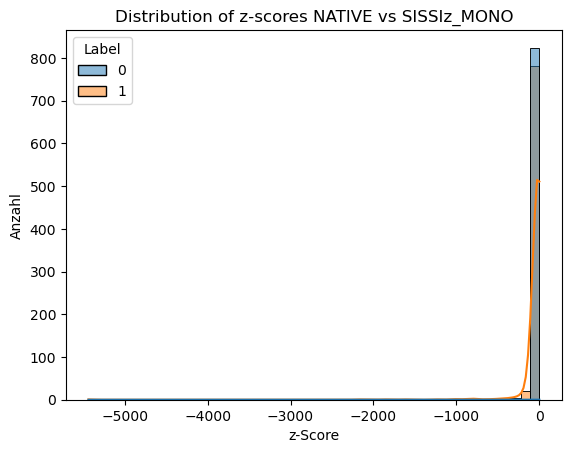

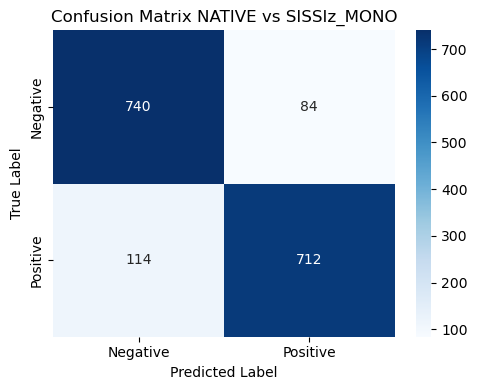


 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       824
           1       0.89      0.86      0.88       826

    accuracy                           0.88      1650
   macro avg       0.88      0.88      0.88      1650
weighted avg       0.88      0.88      0.88      1650



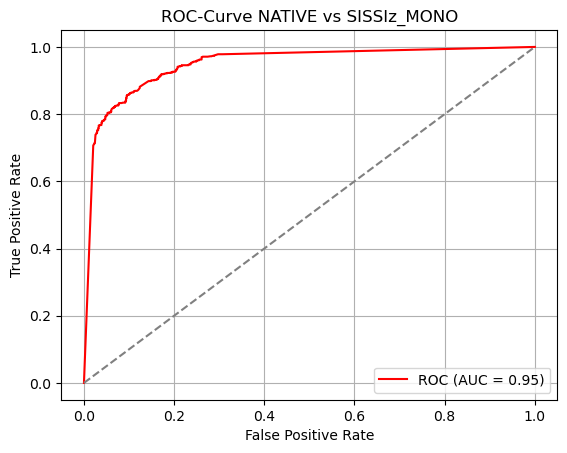

In [4]:
evaluate_classifier(df_native, df_sissiz_mono, title_suffix="NATIVE vs SISSIz_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

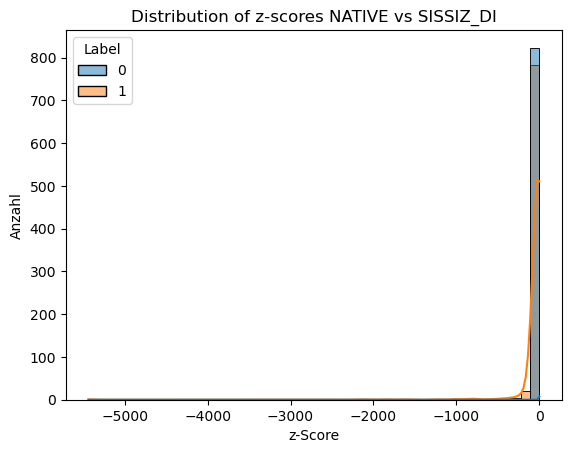

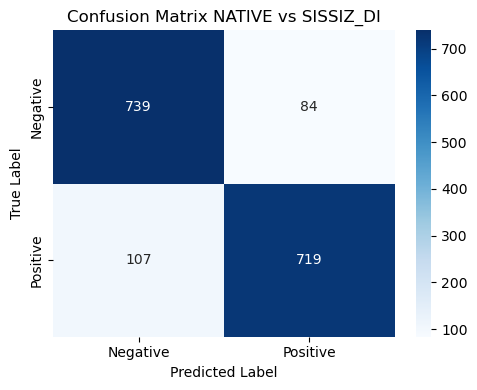


 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       823
           1       0.90      0.87      0.88       826

    accuracy                           0.88      1649
   macro avg       0.88      0.88      0.88      1649
weighted avg       0.88      0.88      0.88      1649



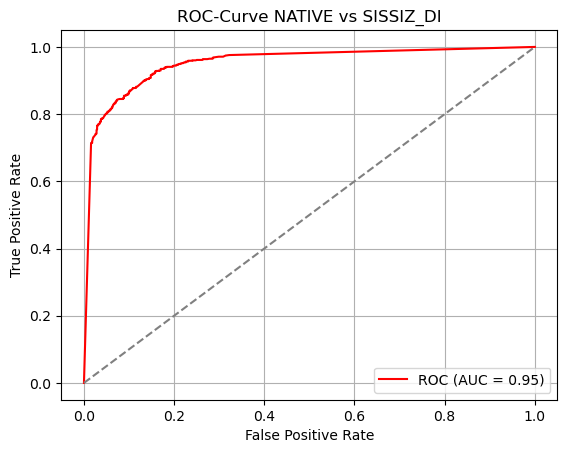

In [5]:
evaluate_classifier(df_native, df_sissiz_di,  title_suffix="NATIVE vs SISSIZ_DI", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

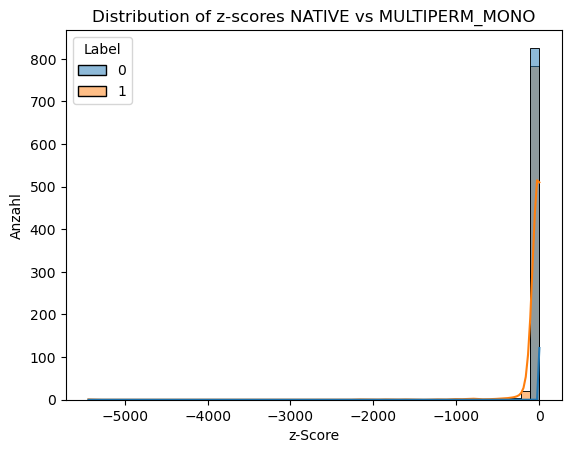

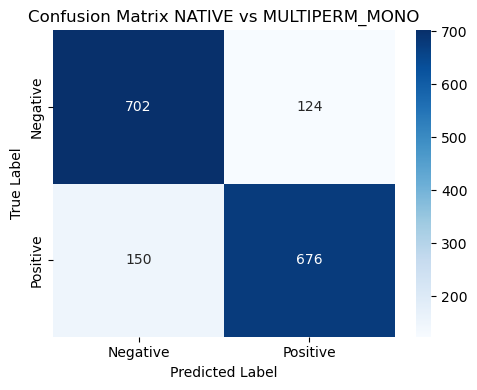


 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       826
           1       0.84      0.82      0.83       826

    accuracy                           0.83      1652
   macro avg       0.83      0.83      0.83      1652
weighted avg       0.83      0.83      0.83      1652



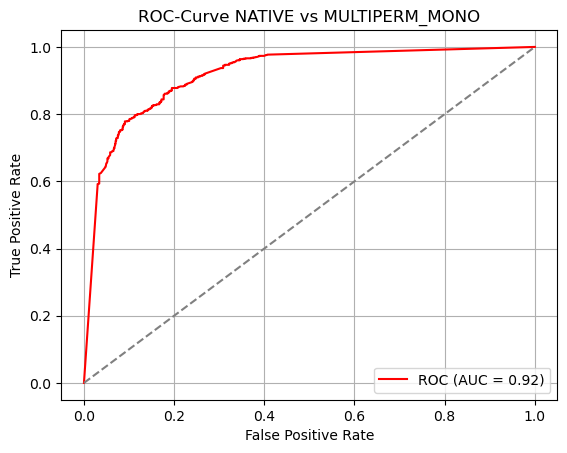

In [6]:
evaluate_classifier(df_native, df_multiperm_mono,  title_suffix="NATIVE vs MULTIPERM_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

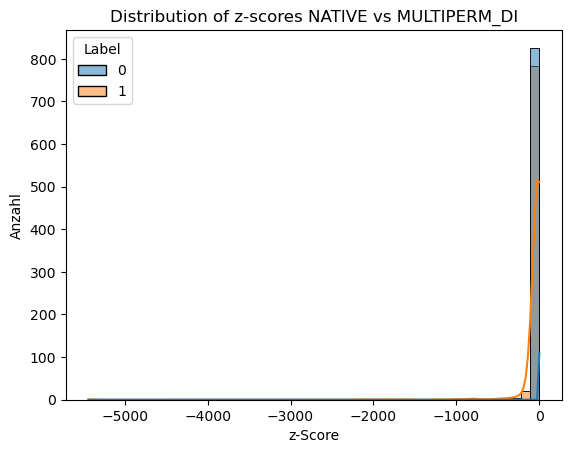

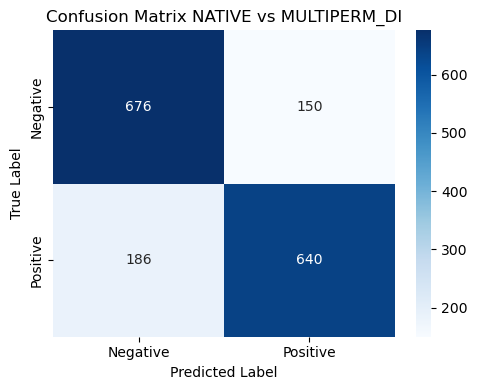


 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       826
           1       0.81      0.77      0.79       826

    accuracy                           0.80      1652
   macro avg       0.80      0.80      0.80      1652
weighted avg       0.80      0.80      0.80      1652



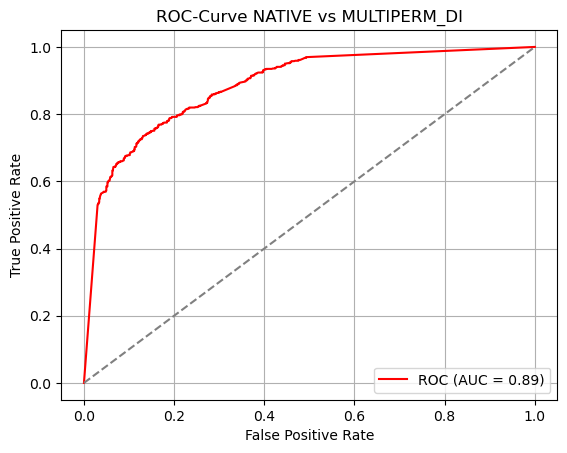

In [7]:
evaluate_classifier(df_native, df_multiperm_di,  title_suffix="NATIVE vs MULTIPERM_DI", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

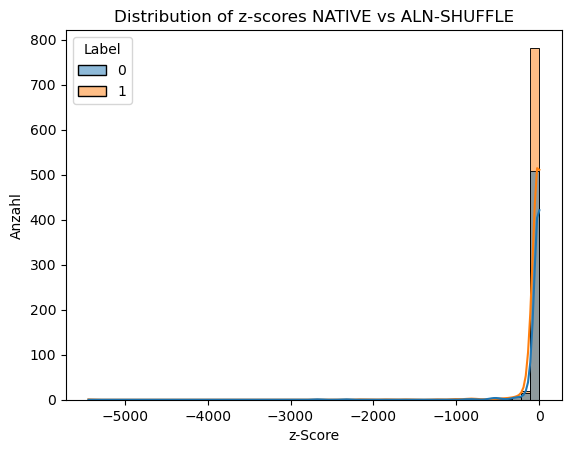

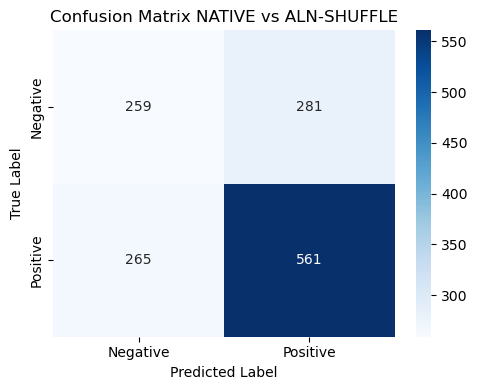


 Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.48      0.49       540
           1       0.67      0.68      0.67       826

    accuracy                           0.60      1366
   macro avg       0.58      0.58      0.58      1366
weighted avg       0.60      0.60      0.60      1366



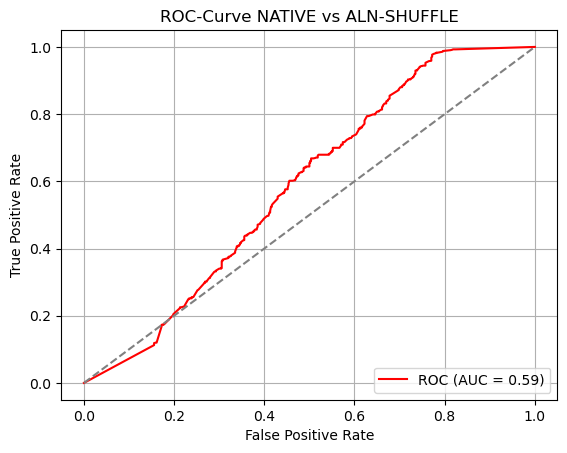

In [8]:
evaluate_classifier(df_native, df_aln_shuffle,  title_suffix="NATIVE vs ALN-SHUFFLE", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

## With Filter

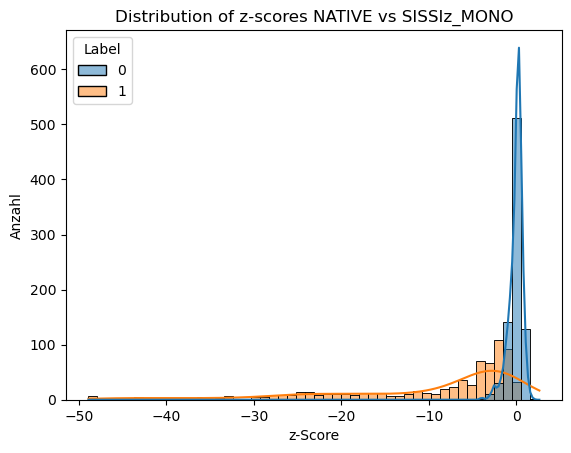

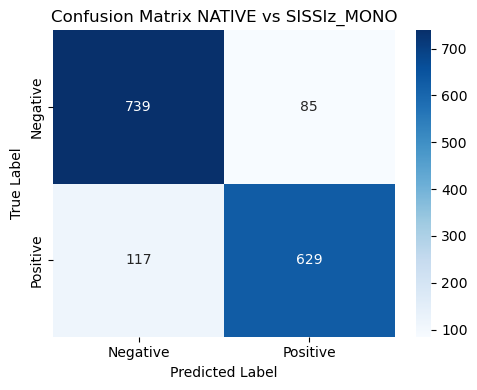


 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       824
           1       0.88      0.84      0.86       746

    accuracy                           0.87      1570
   macro avg       0.87      0.87      0.87      1570
weighted avg       0.87      0.87      0.87      1570



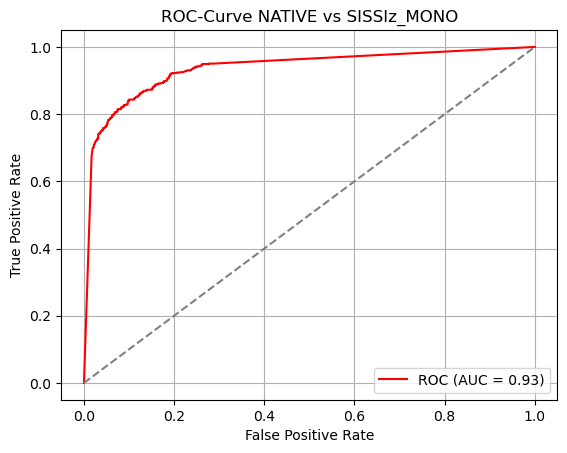

In [9]:
evaluate_classifier(df_native_filterd, df_sissiz_mono_filterd, title_suffix="NATIVE vs SISSIz_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

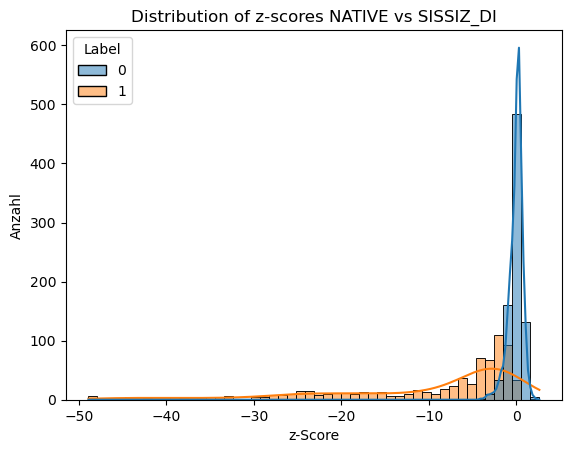

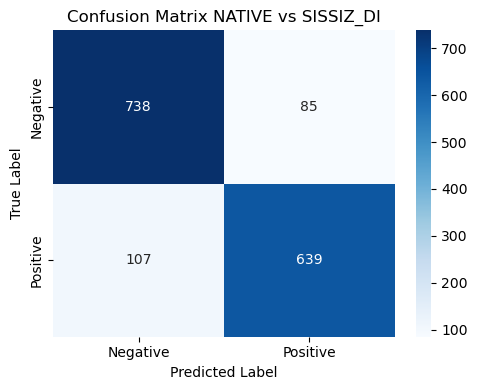


 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       823
           1       0.88      0.86      0.87       746

    accuracy                           0.88      1569
   macro avg       0.88      0.88      0.88      1569
weighted avg       0.88      0.88      0.88      1569



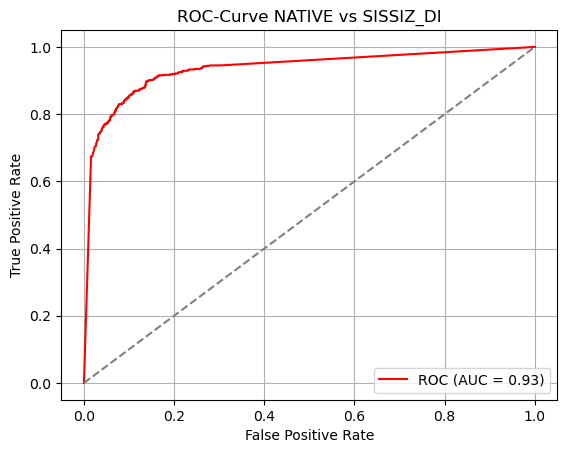

In [10]:
evaluate_classifier(df_native_filterd, df_sissiz_di_filterd,  title_suffix="NATIVE vs SISSIZ_DI", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

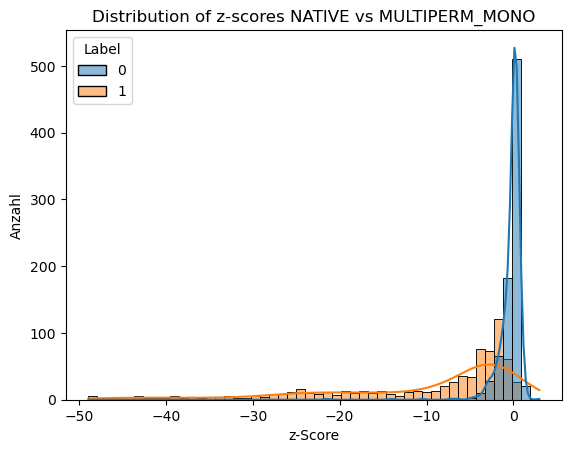

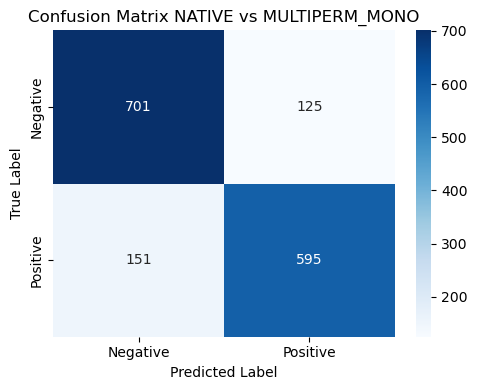


 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       826
           1       0.83      0.80      0.81       746

    accuracy                           0.82      1572
   macro avg       0.82      0.82      0.82      1572
weighted avg       0.82      0.82      0.82      1572



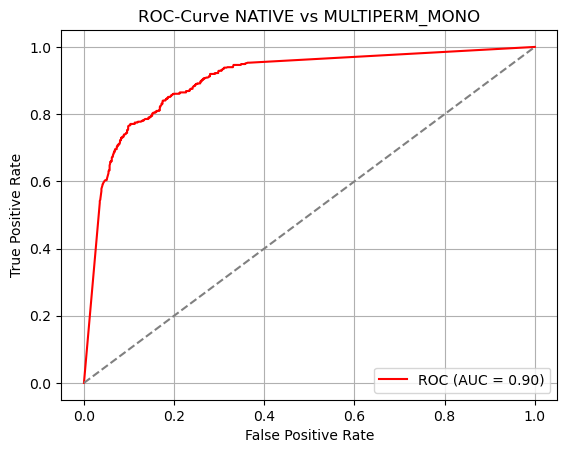

In [11]:
evaluate_classifier(df_native_filterd, df_multiperm_mono_filterd,  title_suffix="NATIVE vs MULTIPERM_MONO", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

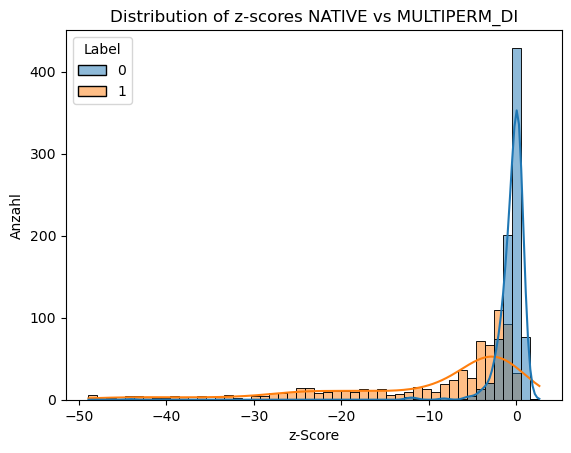

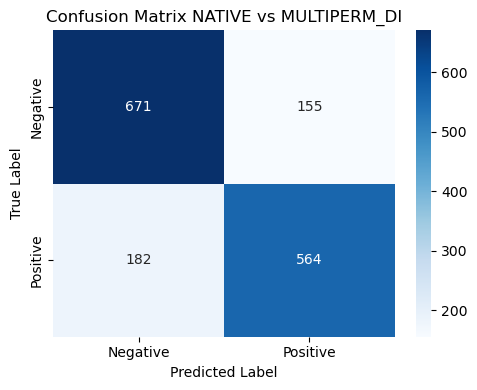


 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       826
           1       0.78      0.76      0.77       746

    accuracy                           0.79      1572
   macro avg       0.79      0.78      0.78      1572
weighted avg       0.79      0.79      0.79      1572



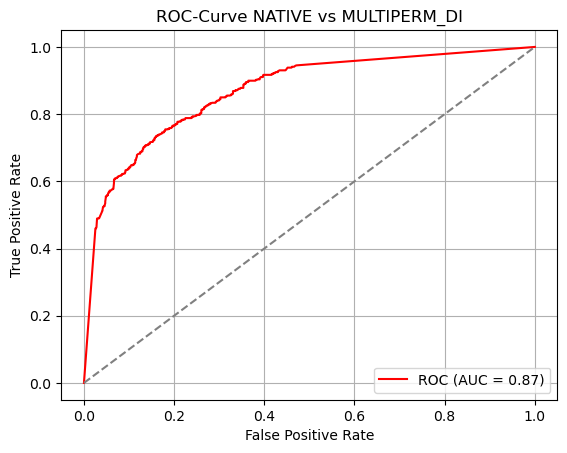

In [12]:
evaluate_classifier(df_native_filterd, df_multiperm_di_filterd,  title_suffix="NATIVE vs MULTIPERM_DI", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")

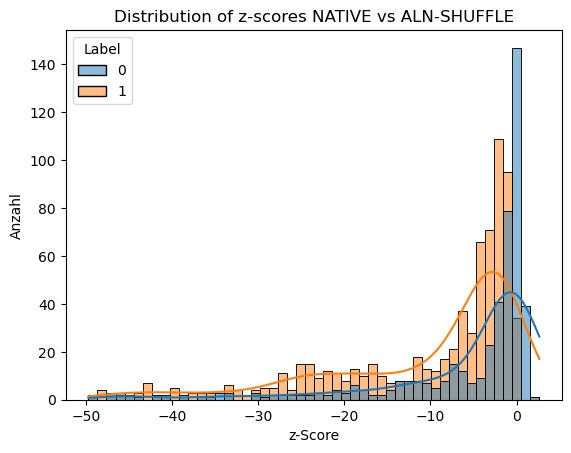

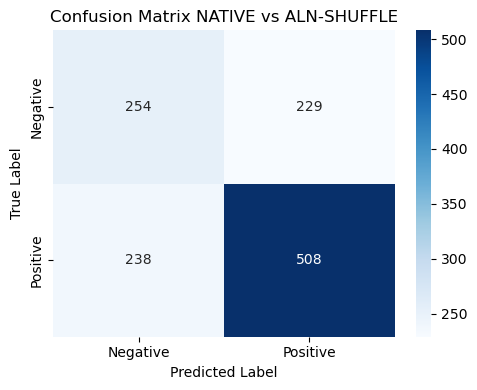


 Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.53      0.52       483
           1       0.69      0.68      0.69       746

    accuracy                           0.62      1229
   macro avg       0.60      0.60      0.60      1229
weighted avg       0.62      0.62      0.62      1229



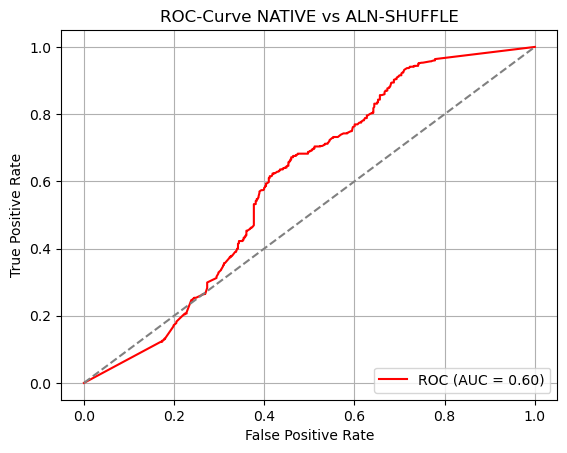

In [13]:
evaluate_classifier(df_native_filterd, df_aln_shuffle_filterd,  title_suffix="NATIVE vs ALN-SHUFFLE", save_path="D:/Masterarbeit/2.Versuch/Result/Native_Results/SISSIz/")